# Chapter 10.2: Linear 2D plate element

In [21]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
sp.init_printing()

### The physical properties of the element

In [22]:
# Material properties
E = 2.0e5  # Young's modulus in Pa
nu = 0.25  # Poisson's ratio
t = 1000  # thickness in mm
t /= 1000  # convert to m

# Define symbolic physical coordinates
x1, y1, x2, y2, x3, y3, x4, y4 = sp.symbols('x1 y1 x2 y2 x3 y3 x4 y4')
# Define the physical nodes as a matrix so it can be used a symbolic evaluation
physical_nodes = sp.Matrix([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])

# Example values for the physical coordinates
x1_val, y1_val = -1, -1
x2_val, y2_val = 1, -1
x3_val, y3_val = 1, 1
x4_val, y4_val = -1, 1
#
# x1_val, y1_val = -1.1, -1.05
# x2_val, y2_val = 1.05, -1.05
# x3_val, y3_val = 1.05, 1.1
# x4_val, y4_val = -1.05, 1.1

# x1_val, y1_val = 3, 2
# x2_val, y2_val = 5, 2
# x3_val, y3_val = 5, 4
# x4_val, y4_val = 3, 4

# # https://habermannr.github.io/FEMVisualizer/
# x1_val, y1_val = 0.1, 0.1
# x2_val, y2_val = 0.9, 0.1
# x3_val, y3_val = 0.9, 0.9010
# x4_val, y4_val = 0.1, 0.9

# Create a dictionary to map the symbolic coordinates to their numerical values
coordinate_values = {
    x1: x1_val, y1: y1_val,
    x2: x2_val, y2: y2_val,
    x3: x3_val, y3: y3_val,
    x4: x4_val, y4: y4_val,
}

### The finite element

This is a rectangular isoparametric 2D plate in the x-y plane.

The natural coordinates are s and t. Node numbering is CCW, starting at ``(-1, -1)``:
```
     ^
     |t
     |
  4--|--3
  |  |--|--->s
  |     |
  1-----2
```

It has 2 degrees of freedom each node:
- u: horizontal displacement
- v: vertical displacement
The DOFs are ordered as follows: u, v.


In [23]:
ND = 2  # number of degrees of freedom per node
NNODE = 4  # number of nodes

### The isoparametric part

In [24]:
n1 = np.array([-1, -1])  # node 1 coordinates
n2 = np.array([1, -1])   # node 2 coordinates
n3 = np.array([1, 1])    # node 3 coordinates
n4 = np.array([-1, 1])   # node 4 coordinates
natural_nodes = np.array([n1, n2, n3, n4])  # all nodes

### Shape functions and their derivatives

In [25]:
# Define symbolic variables. Capital letters S, T are the symbols for the variables s, t
S, T = sp.symbols('s t')

# Define the shape functions symbolically
def shape_functions() -> np.array:
    """shape functions"""

    return np.array([
        0.25 * (1 - S) * (1 - T),
        0.25 * (1 + S) * (1 - T),
        0.25 * (1 + S) * (1 + T),
        0.25 * (1 - S) * (1 + T),
    ])

def isoparametric_mapping() -> np.array:
    """
    Isoparametric mapping natural -> physical coordinates.

    :return: functions returning the physical coordinates
    """

    sh = shape_functions()  # shape functions with substituted values
    return sp.Matrix([sp.Matrix(sh).dot(physical_nodes[:, 0]), sp.Matrix(sh).dot(physical_nodes[:, 1])])


# Calculate the derivatives by s and t, symbolically
def shape_function_derivatives() -> np.array:
    """
    Shape function derivatives.
    [0] = dNi/ds, [1] = dNi/dt
    """
    sh = shape_functions()  # N1, N2, N3, N4
    dN_ds = []
    dN_dt = []

    for i in range(len(sh)):
        dN_ds.append(sp.diff(sh[i], S))
        dN_dt.append(sp.diff(sh[i], T))

    return dN_ds, dN_dt

print()
print('The shape functions are:')
print(shape_functions())
print()
print('The derivatives are:')
derivatives = shape_function_derivatives()
for i, dN in enumerate(derivatives[0]):
    print(f'dN{i+1}/ds = {dN}')
for i, dN in enumerate(derivatives[1]):
    print(f'dN{i+1}/dt = {dN}')

print()
print('The isoparametric mapping is:')
x_map = isoparametric_mapping()[0]
y_map = isoparametric_mapping()[1]
print(f'x = {x_map}')
print(f'y = {y_map}')

# Substitute the symbolic coordinates with numerical values
st_values = {
    S: -0.5773,  # example value for s
    T: -0.5773,  # example value for t
}
print()
print('The isoparametric mapping with coordinate values substituted is:')
x_map_substituted = x_map.subs(st_values)
y_map_substituted = y_map.subs(st_values)
print(f'x = {x_map_substituted}')
print(f'y = {y_map_substituted}')

print()
print('The derivatives of the shape functions by s are:')
print(derivatives[0])  # derivatives by s

print()
print('The derivatives of the shape functions by t are:')
print(derivatives[1])  # derivatives by t


The shape functions are:
[(0.25 - 0.25*s)*(1 - t) (1 - t)*(0.25*s + 0.25) (0.25*s + 0.25)*(t + 1)
 (0.25 - 0.25*s)*(t + 1)]

The derivatives are:
dN1/ds = 0.25*t - 0.25
dN2/ds = 0.25 - 0.25*t
dN3/ds = 0.25*t + 0.25
dN4/ds = -0.25*t - 0.25
dN1/dt = 0.25*s - 0.25
dN2/dt = -0.25*s - 0.25
dN3/dt = 0.25*s + 0.25
dN4/dt = 0.25 - 0.25*s

The isoparametric mapping is:
x = x1*(0.25 - 0.25*s)*(1 - t) + x2*(1 - t)*(0.25*s + 0.25) + x3*(0.25*s + 0.25)*(t + 1) + x4*(0.25 - 0.25*s)*(t + 1)
y = y1*(0.25 - 0.25*s)*(1 - t) + y2*(1 - t)*(0.25*s + 0.25) + y3*(0.25*s + 0.25)*(t + 1) + y4*(0.25 - 0.25*s)*(t + 1)

The isoparametric mapping with coordinate values substituted is:
x = 0.6219688225*x1 + 0.1666811775*x2 + 0.0446688225*x3 + 0.1666811775*x4
y = 0.6219688225*y1 + 0.1666811775*y2 + 0.0446688225*y3 + 0.1666811775*y4

The derivatives of the shape functions by s are:
[0.25*t - 0.25, 0.25 - 0.25*t, 0.25*t + 0.25, -0.25*t - 0.25]

The derivatives of the shape functions by t are:
[0.25*s - 0.25, -0.25*s 

### The shape function matrix

The shape function matrix $N$ is a matrix that contains the shape functions for each node. It has the structure:
$$
N = \begin{bmatrix}
N_1 & 0 & N_2 & 0 & N_3 & 0 & N_4 & 0\\
0 & N_1 & 0 & N_2 & 0 & N_3 & 0 & N_4\\
\end{bmatrix}
$$

In [26]:
def N() -> np.array:
    """
    shape function matrix N.
    It has the structure:
    [[N1, 0, N2, 0, N3, 0, N4, 0],
     [0, N1, 0, N2, 0, N3, 0, N4]]

    """
    _N = shape_functions()  # the shape functions

    # preparing the return matrix
    _ret = sp.Matrix(ND, ND * NNODE, lambda i, j: 0)  # ND rows, ND * NNODE columns

    # filling the matrix
    for i in range(NNODE):
        for j in range(ND):
            _ret[j, j + ND * i] = _N[i]

    return _ret

_N = N()
print("The shape function matrix N is {}:".format(_N.shape))
print()
print('The N matrix at s: -0.5773, t: -0.5773')
sp.pprint(_N.subs({S: -0.5773, T: -0.5773}).evalf(), wrap_line=False)
print('The N matrix at s: -0.5773, t: 0.5773')
sp.pprint(_N.subs({S: -0.5773, T: 0.5773}).evalf(), wrap_line=False)

The shape function matrix N is (2, 8):

The N matrix at s: -0.5773, t: -0.5773
⎡0.6219688225       0        0.1666811775       0        0.0446688225       0        0.1666811775       0      ⎤
⎢                                                                                                              ⎥
⎣     0        0.6219688225       0        0.1666811775       0        0.0446688225       0        0.1666811775⎦
The N matrix at s: -0.5773, t: 0.5773
⎡0.1666811775       0        0.0446688225       0        0.1666811775       0        0.6219688225       0      ⎤
⎢                                                                                                              ⎥
⎣     0        0.1666811775       0        0.0446688225       0        0.1666811775       0        0.6219688225⎦


### The jacobian matrix

The jacobian matrix does the following:
- maps the natural coordinates (s, t) to the physical coordinates (x, y) as it a measure how the physical coordinates change when the natural coordinates change.
- it is used to transform the derivatives of the shape functions from the natural coordinates to the physical coordinates using the chain rule.

So the jacobian is constructed using the chain rule, from the derivatives of the mapping between the global and the local system, and its value depends on the physical coordinates. The Jacobian changes within the element because the mapping from the natural coordinates (s, t) to the physical coordinates (x, y) is not necessarily linear. The derivatives of the mapping functions (x_map, y_map) with respect to s and t (which form the Jacobian) depend on the shape and distortion of the element in physical space. Since s and t vary across the element, the derivatives, and thus the Jacobian, also vary.

$$J = \begin{bmatrix}
\frac{\partial x}{\partial s} & \frac{\partial y}{\partial s} \\
\frac{\partial x}{\partial t} & \frac{\partial y}{\partial t}
\end{bmatrix}$$

The chain rule for derivation is:

$$\frac{\partial f}{\partial s} = \frac{\partial f}{\partial x} \frac{\partial x}{\partial s} + \frac{\partial f}{\partial y} \frac{\partial y}{\partial s}$$

$$\frac{\partial f}{\partial t} = \frac{\partial f}{\partial x} \frac{\partial x}{\partial t} + \frac{\partial f}{\partial y} \frac{\partial y}{\partial t}$$

The determinant of the jacobian is used to account for the change of the element area when transforming from the natural to the physical coordinates.

$$\begin{Bmatrix}
\epsilon_x \\
\epsilon_y \\
\gamma_{xy}
\end{Bmatrix}=
\begin{bmatrix}
\frac{\partial ()}{\partial x} & 0 \\
0 & \frac{\partial ()}{\partial y} \\
\frac{\partial ()}{\partial y} & \frac{\partial ()}{\partial x} \\
\end{bmatrix}
\begin{Bmatrix}
u \\
v
\end{Bmatrix}$$

with

$$\begin{matrix}\frac{\partial ()}{\partial x}\end{matrix}=
\frac{1}{\begin{vmatrix}J\end{vmatrix}}\begin{bmatrix}\frac{\partial y}{\partial t}\frac{\partial ()}{\partial s}-\frac{\partial y}{\partial s}\frac{\partial ()}{\partial t}\end{bmatrix}$$

$$\begin{matrix}\frac{\partial ()}{\partial y}\end{matrix}=
\frac{1}{\begin{vmatrix}J\end{vmatrix}}\begin{bmatrix}\frac{\partial x}{\partial s}\frac{\partial ()}{\partial t}-\frac{\partial x}{\partial t}\frac{\partial ()}{\partial s}\end{bmatrix}$$

In [27]:
def jacobian() -> sp.Matrix:
    """
    Calculate the jacobian matrix for the isoparametric mapping.
    """
    # Calculate the derivatives
    dx_ds = sp.diff(x_map, S)
    dy_ds = sp.diff(y_map, S)
    dx_dt = sp.diff(x_map, T)
    dy_dt = sp.diff(y_map, T)

    return sp.Matrix([[dx_ds, dy_ds],
                      [dx_dt, dy_dt]])

# Calculate the jacobian matrix symbolically
J = jacobian()

# Substitute the symbolic coordinates with numerical values in the Jacobian
J_substituted = J.subs(coordinate_values)

print('The jacobian matrix with coordinate values substituted is:')
sp.pprint(J_substituted)
print()

# Evaluate the jacobian matrix at some points
for s_eval in [-0.5773, 0, 0.5773]:
    for t_eval in [-0.5773, 0, 0.5773]:
        J_evaluated = J_substituted.subs({S: s_eval, T: t_eval})
        print(f'Jacobian matrix at s={s_eval}, t={t_eval}:')
        sp.pprint(J_evaluated)
        print(f'The determinant at this point is |J|={J_evaluated.det():.2f}')
        print()


The jacobian matrix with coordinate values substituted is:
⎡1.0   0 ⎤
⎢        ⎥
⎣ 0   1.0⎦

Jacobian matrix at s=-0.5773, t=-0.5773:
⎡1.0   0 ⎤
⎢        ⎥
⎣ 0   1.0⎦
The determinant at this point is |J|=1.00

Jacobian matrix at s=-0.5773, t=0:
⎡1.0   0 ⎤
⎢        ⎥
⎣ 0   1.0⎦
The determinant at this point is |J|=1.00

Jacobian matrix at s=-0.5773, t=0.5773:
⎡1.0   0 ⎤
⎢        ⎥
⎣ 0   1.0⎦
The determinant at this point is |J|=1.00

Jacobian matrix at s=0, t=-0.5773:
⎡1.0   0 ⎤
⎢        ⎥
⎣ 0   1.0⎦
The determinant at this point is |J|=1.00

Jacobian matrix at s=0, t=0:
⎡1.0   0 ⎤
⎢        ⎥
⎣ 0   1.0⎦
The determinant at this point is |J|=1.00

Jacobian matrix at s=0, t=0.5773:
⎡1.0   0 ⎤
⎢        ⎥
⎣ 0   1.0⎦
The determinant at this point is |J|=1.00

Jacobian matrix at s=0.5773, t=-0.5773:
⎡1.0   0 ⎤
⎢        ⎥
⎣ 0   1.0⎦
The determinant at this point is |J|=1.00

Jacobian matrix at s=0.5773, t=0:
⎡1.0   0 ⎤
⎢        ⎥
⎣ 0   1.0⎦
The determinant at this point is |J|=1.00

Jacobian ma

In [28]:
%matplotlib notebook

# Calculate the determinant of the Jacobian
J_det = J.det()

# Substitute the symbolic coordinates with numerical values in the Jacobian
J_det_substituted = J_det.subs(coordinate_values)

# Create a function to evaluate the determinant for given xi and eta
J_det_func = sp.lambdify((S, T), J_det_substituted)

# Create a grid of xi and eta values
xi_vals = np.linspace(-1, 1, 50)
eta_vals = np.linspace(-1, 1, 50)
xi_grid, eta_grid = np.meshgrid(xi_vals, eta_vals)

# Evaluate the determinant on the grid
det_values = J_det_func(xi_grid, eta_grid)

if isinstance(det_values, float):
    det_values = np.ones([len(xi_vals), len(eta_vals)]) * det_values

# Map xi and eta values to x and y coordinates
x_vals = sp.lambdify((S, T), x_map.subs(coordinate_values))(xi_grid, eta_grid)
y_vals = sp.lambdify((S, T), y_map.subs(coordinate_values))(xi_grid, eta_grid)

# # move the physical element so the centroid is at 0, 0
x_vals -= np.mean([x1_val, x2_val, x3_val, x4_val])
y_vals -= np.mean([y1_val, y2_val, y3_val, y4_val])

# Create the contour plot
plt.figure()
contour = plt.contourf(x_vals, y_vals, det_values, levels=50, cmap='viridis')

# plot the natural element shape, too
plt.plot([-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1], 'k--', label='Natural Element Shape')

# setting the limits so everything is visible
plt.xlim([1.5 * min(-1, np.min(x_vals)), 1.5 * max(1, np.max(x_vals))])
plt.ylim([1.5 * min(-1, np.min(y_vals)), 1.5 * max(1, np.max(y_vals))])

# adding the real physical coordinates to the positions of the moved nodes
x1_val_pos = x1_val - np.mean([x1_val, x2_val, x3_val, x4_val])
y1_val_pos = y1_val - np.mean([y1_val, y2_val, y3_val, y4_val])
x2_val_pos = x2_val - np.mean([x1_val, x2_val, x3_val, x4_val])
y2_val_pos = y2_val - np.mean([y1_val, y2_val, y3_val, y4_val])
x3_val_pos = x3_val - np.mean([x1_val, x2_val, x3_val, x4_val])
y3_val_pos = y3_val - np.mean([y1_val, y2_val, y3_val, y4_val])
x4_val_pos = x4_val - np.mean([x1_val, x2_val, x3_val, x4_val])
y4_val_pos = y4_val - np.mean([y1_val, y2_val, y3_val, y4_val])

for xpos, ypos, xtext, ytext in zip(
        [x1_val_pos, x2_val_pos, x3_val_pos, x4_val_pos],
        [y1_val_pos, y2_val_pos, y3_val_pos, y4_val_pos],
        [coordinate_values[x1], coordinate_values[x2], coordinate_values[x3], coordinate_values[x4]],
        [coordinate_values[y1], coordinate_values[y2], coordinate_values[y3], coordinate_values[y4]]
):
    plt.plot(xpos, ypos, 'ro')  # plot the physical nodes
    plt.text(xpos, ypos, f'({xtext:.2f}, {ytext:.2f})', fontsize=8, ha='right')

# add a vertical and horizontal line at the origin
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(0, color='k', linestyle='--', linewidth=0.5)

plt.colorbar(contour, label='det(J)')

plt.title('Jacobian of the physical element with the local element.\nCentroids are matched at (0, 0), real coordinates shown.')
plt.xlabel('xi')
plt.ylabel('eta')
plt.axis('equal')
plt.show()

<IPython.core.display.Javascript object>

### $\begin{bmatrix}B_i\end{bmatrix}$ matrix
One block of the B matrix, which relates the strain to the displacement for node i.

In [29]:
def calculate_Bi(i):
    """
    Calculates the B-matrix for node i.
    Bi is the matrix that relates the strain to the displacement for node i.
    """
    J_symbolic = jacobian()
    J_det_symbolic = J_symbolic.det()

    dNds, dNdt = shape_function_derivatives()  # dN(i)/ds, dN(i)/dt

    # calculating ∂(Ni)/∂x und ∂(Ni)/∂y
    # Using the chain rule:
    dNi_dx = (1/J_det_symbolic) * (sp.diff(y_map, T) * dNds[i] - sp.diff(y_map, S) * dNdt[i])
    dNi_dy = (1/J_det_symbolic) * (sp.diff(x_map, S) * dNdt[i] - sp.diff(x_map, T) * dNds[i])

    # Die Bi-Matrix zusammenstellen
    Bi_matrix = sp.Matrix([
        [dNi_dx, 0],
        [0, dNi_dy],
        [dNi_dy, dNi_dx]
    ])
    return Bi_matrix

B_symbolic = sp.Matrix.hstack(calculate_Bi(0), calculate_Bi(1), calculate_Bi(2), calculate_Bi(3))

#
# The B matrix for node 'node_index' is calculated symbolically:
node_index = 0
Bi_symbolic = calculate_Bi(node_index)

# using the coordinate values to substitute the symbolic coordinates with numerical values.
# This gets the B matrix for that node of a specific element.
Bi_element = Bi_symbolic.subs(coordinate_values)

# 3. Evaluating the B matrix at specific points in the natural coordinate system.
# This is done here for all Gauss points in the natural coordinate system.
# At this point we get the B matrix for a specific node of a specific element at the Gauss points.

for gs in [-1 / np.sqrt(3), 1 / np.sqrt(3)]:
    for gt in [-1 / np.sqrt(3), 1 / np.sqrt(3)]:
        Bi_evaluated = Bi_element.subs({S: gs, T: gt}).evalf()
        Bi_formatted = Bi_evaluated.applyfunc(lambda x: x.round(4))
        print(f"\nB{node_index + 1}-Matrix, ausgewertet am Gausspunkt (s={gs:.4f}, t={gt:.4f}):")
        sp.pprint(Bi_formatted)



B1-Matrix, ausgewertet am Gausspunkt (s=-0.5774, t=-0.5774):
⎡-0.3943     0   ⎤
⎢                ⎥
⎢   0     -0.3943⎥
⎢                ⎥
⎣-0.3943  -0.3943⎦

B1-Matrix, ausgewertet am Gausspunkt (s=-0.5774, t=0.5774):
⎡-0.1057     0   ⎤
⎢                ⎥
⎢   0     -0.3943⎥
⎢                ⎥
⎣-0.3943  -0.1057⎦

B1-Matrix, ausgewertet am Gausspunkt (s=0.5774, t=-0.5774):
⎡-0.3943     0   ⎤
⎢                ⎥
⎢   0     -0.1057⎥
⎢                ⎥
⎣-0.1057  -0.3943⎦

B1-Matrix, ausgewertet am Gausspunkt (s=0.5774, t=0.5774):
⎡-0.1057     0   ⎤
⎢                ⎥
⎢   0     -0.1057⎥
⎢                ⎥
⎣-0.1057  -0.1057⎦


### The full $\begin{bmatrix}B\end{bmatrix}$ matrix
The full B matrix is constructed by horizontally concatenating the individual Bi matrices for each node.

In [30]:
B_symbolic = sp.Matrix.hstack(calculate_Bi(0), calculate_Bi(1), calculate_Bi(2), calculate_Bi(3))
B_element = B_symbolic.subs(coordinate_values)

for gs in [-1 / np.sqrt(3), 1 / np.sqrt(3)]:
    for gt in [-1 / np.sqrt(3), 1 / np.sqrt(3)]:
        B_evaluated = B_element.subs({S: gs, T: gt}).evalf()
        B_formatted = B_evaluated.applyfunc(lambda x: x.round(4))
        print(f"\nB-Matrix, ausgewertet am Gausspunkt (s={gs:.4f}, t={gt:.4f}):")
        sp.pprint(B_formatted)



B-Matrix, ausgewertet am Gausspunkt (s=-0.5774, t=-0.5774):
⎡-0.3943     0     0.3943      0     0.1057    0     -0.1057     0   ⎤
⎢                                                                    ⎥
⎢   0     -0.3943     0     -0.1057    0     0.1057     0     0.3943 ⎥
⎢                                                                    ⎥
⎣-0.3943  -0.3943  -0.1057  0.3943   0.1057  0.1057  0.3943   -0.1057⎦

B-Matrix, ausgewertet am Gausspunkt (s=-0.5774, t=0.5774):
⎡-0.1057     0     0.1057      0     0.3943    0     -0.3943     0   ⎤
⎢                                                                    ⎥
⎢   0     -0.3943     0     -0.1057    0     0.1057     0     0.3943 ⎥
⎢                                                                    ⎥
⎣-0.3943  -0.1057  -0.1057  0.1057   0.1057  0.3943  0.3943   -0.3943⎦

B-Matrix, ausgewertet am Gausspunkt (s=0.5774, t=-0.5774):
⎡-0.3943     0     0.3943      0     0.1057    0     -0.1057     0   ⎤
⎢                                     

### The full $\begin{bmatrix}B\end{bmatrix}$ matrix
This is the way the book caclulates, using precalculated values for a, b, c, d.

In [31]:
# Stellen Sie sicher, dass die numerischen Koordinaten zugewiesen sind
y1_val, y2_val, y3_val, y4_val = coordinate_values[y1], coordinate_values[y2], coordinate_values[y3], coordinate_values[y4]
x1_val, x2_val, x3_val, x4_val = coordinate_values[x1], coordinate_values[x2], coordinate_values[x3], coordinate_values[x4]

# Definieren Sie die Funktionen a, b, c, d mit den numerischen Werten
def a_term():
    return 0.25 * (y1_val * (S - 1) + y2_val * (-1 - S) + y3_val * (1 + S) + y4_val * (1 - S))

def b_term():
    return 0.25 * (y1_val * (T - 1) + y2_val * (1 - T) + y3_val * (1 + T) + y4_val * (-1 - T))

def c_term():
    return 0.25 * (x1_val * (T - 1) + x2_val * (1 - T) + x3_val * (1 + T) + x4_val * (-1 - T))

def d_term():
    return 0.25 * (x1_val * (S - 1) + x2_val * (-1 - S) + x3_val * (1 + S) + x4_val * (1 - S))

# Holen Sie sich die Ableitungen der Formfunktionen
dN_ds, dN_dt = shape_function_derivatives()

# Holen Sie sich die Determinante der Jacobi-Matrix
J_det_element = jacobian().subs(coordinate_values).det()

# Erstellen Sie die B-Matrix
B = sp.zeros(3, 8)
for i in range(NNODE):
    # Berechnen Sie die Terme für die i-te Spalte der B-Matrix
    term1 = a_term() * dN_ds[i] + b_term() * dN_dt[i]
    term2 = c_term() * dN_dt[i] - d_term() * dN_ds[i]

    # # Füllen Sie die Spalten für Knoten i
    B[0, 2 * i] = term1
    B[1, 2 * i + 1] = term2
    B[2, 2 * i] = term2
    B[2, 2 * i + 1] = term1

# Teilen Sie durch die Determinante
B = (1 / J_det_element) * B

# Auswertung am Gausspunkt zur Überprüfung
for gs in [-1 / sp.sqrt(3), 1 / sp.sqrt(3)]:
    for gt in [-1 / sp.sqrt(3), 1 / sp.sqrt(3)]:
        B_evaluated = B.subs({S: gs, T: gt}).evalf()
        B_formatted = B_evaluated.applyfunc(lambda x: x.round(4))
        print("\nB-Matrix, ausgewertet am Gausspunkt ({:.4f}, {:.4f}):".format(gs, gt))
        sp.pprint(B_formatted)


B-Matrix, ausgewertet am Gausspunkt (-0.5774, -0.5774):
⎡-0.3943     0     0.3943      0     0.1057    0     -0.1057     0   ⎤
⎢                                                                    ⎥
⎢   0     -0.3943     0     -0.1057    0     0.1057     0     0.3943 ⎥
⎢                                                                    ⎥
⎣-0.3943  -0.3943  -0.1057  0.3943   0.1057  0.1057  0.3943   -0.1057⎦

B-Matrix, ausgewertet am Gausspunkt (-0.5774, 0.5774):
⎡-0.1057     0     0.1057      0     0.3943    0     -0.3943     0   ⎤
⎢                                                                    ⎥
⎢   0     -0.3943     0     -0.1057    0     0.1057     0     0.3943 ⎥
⎢                                                                    ⎥
⎣-0.3943  -0.1057  -0.1057  0.1057   0.1057  0.3943  0.3943   -0.3943⎦

B-Matrix, ausgewertet am Gausspunkt (0.5774, -0.5774):
⎡-0.3943     0     0.3943      0     0.1057    0     -0.1057     0   ⎤
⎢                                                 

### Quadrature points and weights

In [32]:
gi_data = {
    1: {
        'point': [0],
        'weight': [2]
    },
    2: {
        # 'point': [-1 / np.sqrt(3), 1 / np.sqrt(3)],
        'point': [-0.5774, 0.5774],
        'weight': [1, 1]
    },
    3: {
        'point': [-np.sqrt(3 / 5), 0, np.sqrt(3 / 5)],
        'weight': [5 / 9,  8 / 9, 5 / 9]
    },
    4: {
        'point': [-0.861136, -0.339981, 0.339981, 0.861136],
        'weight': [0.347855, 0.652145, 0.652145, 0.347855]
    },
    5: {
        'point': [-0.906180, -0.538469, 0, 0.906180, 0.538469],
        'weight': [0.236927, 0.478629, 0.568889, 0.478629, 0.236927]
    },
    6: {
        'point': [-0.932469, -0.661209, -0.238619, 0.238619, 0.661209, 0.932469],
        'weight': [0.171324, 0.360761, 0.467914, 0.467914, 0.360761, 0.171324]
    }
}

### Getting the stiffness matrix

In [33]:
NG = 2  # number of gauss points in each direction

def D_matrix():
    """
    Gets the constitutive matrix D for the element.
    This is a function of the physical coordinates and the jacobian.
    """

    # Calculate the D matrix
    D = sp.Matrix([[1, nu, 0],
                   [nu, 1, 0],
                   [0, 0, (1 - nu) / 2]])

    # Scale by E and thickness
    D *= E / (1 - nu**2)

    return D


def K_matrix() -> np.array:
    """
    Gets the stiffness matrix for the element.
    """
    K_lok = sp.zeros(NNODE * ND, NNODE * ND)  # initialize the stiffness matrix
    J = jacobian()
    J_substituted = J.subs(coordinate_values)
    D = D_matrix()
    print('The constitutive matrix D is:')
    sp.pprint(D)

    for i in range(NG):
        for j in range(NG):
            s = gi_data[NG]['point'][i]
            t = gi_data[NG]['point'][j]
            w = gi_data[NG]['weight'][i] * gi_data[NG]['weight'][j]

            print()
            print('Gausspunkt (s, t):', s, t)

            # Calculate the jacobian at the gauss point
            J_evaluated = J_substituted.subs({S: s, T: t}).evalf()
            det_J = J_evaluated.det()
            print('|J| at the Gauss point:')
            print(det_J)
            B_symbolic = sp.Matrix.hstack(calculate_Bi(0), calculate_Bi(1), calculate_Bi(2), calculate_Bi(3))
            B_element = B_symbolic.subs(coordinate_values)
            B = B_element.subs({S: s, T: t}).evalf()
            print('B-Matrix at the Gauss point:')
            sp.pprint(B)

            # Calculate the stiffness matrix contribution
            K_contribution = B.T * D * B * det_J * w
            K_lok += K_contribution
            print()
            print('K-Matrix contribution at {}, {}:'.format(s, t))
            K_con_formatted = K_contribution.applyfunc(lambda x: x.round(0))
            sp.pprint(K_con_formatted)

    return K_lok

# the full K matrix
print()
print('The full stiffness matrix K is:')
K = K_matrix()
sp.pprint(K.applyfunc(lambda x: int(x)))


The full stiffness matrix K is:
The constitutive matrix D is:
⎡213333.333333333  53333.3333333333     0   ⎤
⎢                                           ⎥
⎢53333.3333333333  213333.333333333     0   ⎥
⎢                                           ⎥
⎣       0                 0          80000.0⎦

Gausspunkt (s, t): -0.5774 -0.5774
|J| at the Gauss point:
1.00000000000000
B-Matrix at the Gauss point:
⎡-0.39435     0      0.39435      0      0.10565     0     -0.10565     0    ⎤
⎢                                                                            ⎥
⎢   0      -0.39435     0      -0.10565     0     0.10565     0      0.39435 ⎥
⎢                                                                            ⎥
⎣-0.39435  -0.39435  -0.10565  0.39435   0.10565  0.10565  0.39435   -0.10565⎦

K-Matrix contribution at -0.5774, -0.5774:
⎡45617.0   20735.0   -29843.0  -10219.0  -12221.0  -5555.0   -3553.0   -4961.0 ⎤
⎢                                                                              ⎥


### Checking the stiffness matrix

In [34]:
# the stiffness matrix as a numpy array
K_np = np.array(K).astype(np.float64)

# the eigenvalues
eigenvalues, eigenvectors = np.linalg.eigh(K_np)
print()
print('The eigenvalues of the stiffness matrix K are:')
eigenvalues = sorted([float(x) for x in eigenvalues])

print()
print(eigenvectors.shape)
sp.pprint(eigenvectors)

# the eigenvectors for the near-zero eigenvalues
nearzero_eigenvalues = [ev for ev in eigenvalues if abs(ev) < 1e-10]
# printing the eigenvectors for the near-zero eigenvalues
print('The eigenvectors for the near-zero eigenvalues are:')
for i, ev in enumerate(nearzero_eigenvalues):
    print(f'Eigenvalue {i + 1}: {ev:.6f}')
    print('Eigenvector:')
    print(eigenvectors[:, i])
    print()


The eigenvalues of the stiffness matrix K are:

(8, 8)
 [[-9.88176358e-03 -4.95046395e-01  3.60321270e-01 -2.05291825e-01 
  -4.55911468e-01  1.38777878e-16 -5.00000000e-01 -3.53553391e-01] 
  [ 5.47216610e-01  2.71731114e-01  4.14268453e-02 -4.55911468e-01 
   2.05291825e-01  5.00000000e-01  1.66533454e-16 -3.53553391e-01] 
  [-9.88176358e-03 -4.95046395e-01  3.60321270e-01  2.05291825e-01 
   4.55911468e-01  5.00000000e-01  2.77555756e-16  3.53553391e-01] 
  [ 1.01198076e-01  1.67767136e-01  5.80183710e-01  4.55911468e-01 
  -2.05291825e-01 -3.50414142e-16  5.00000000e-01 -3.53553391e-01] 
  [ 4.36136770e-01 -3.91082417e-01 -1.78435594e-01 -2.05291825e-01 
  -4.55911468e-01 -1.11022302e-16  5.00000000e-01  3.53553391e-01] 
  [ 1.01198076e-01  1.67767136e-01  5.80183710e-01 -4.55911468e-01 
   2.05291825e-01 -5.00000000e-01 -1.38777878e-16  3.53553391e-01] 
  [ 4.36136770e-01 -3.91082417e-01 -1.78435594e-01  2.05291825e-01 
   4.55911468e-01 -5.00000000e-01 -3.60822483e-16 -3.5355339

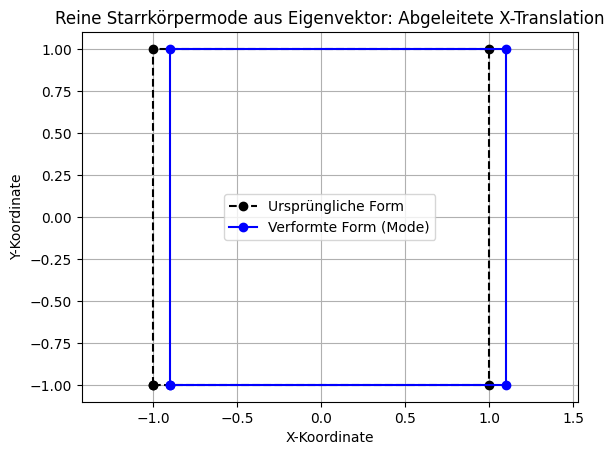

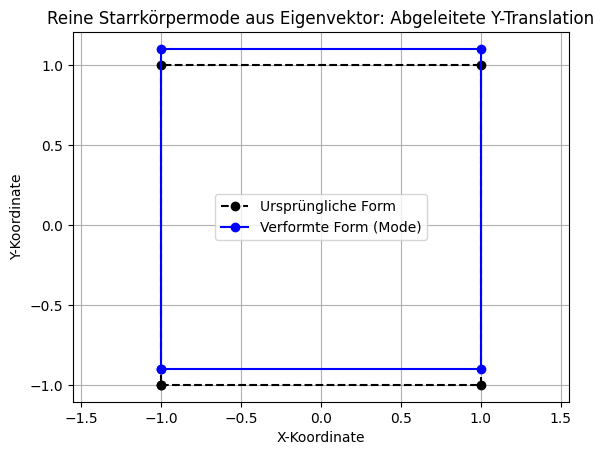

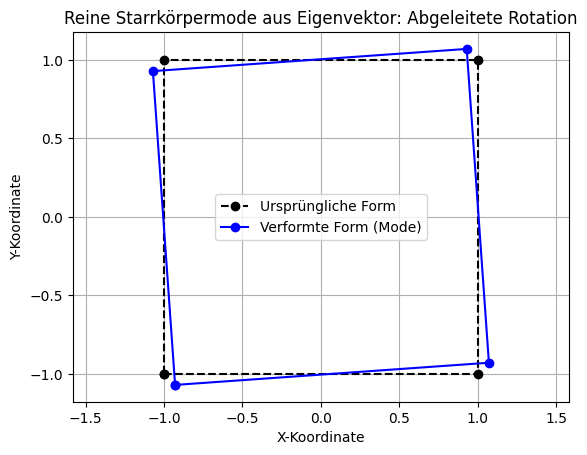

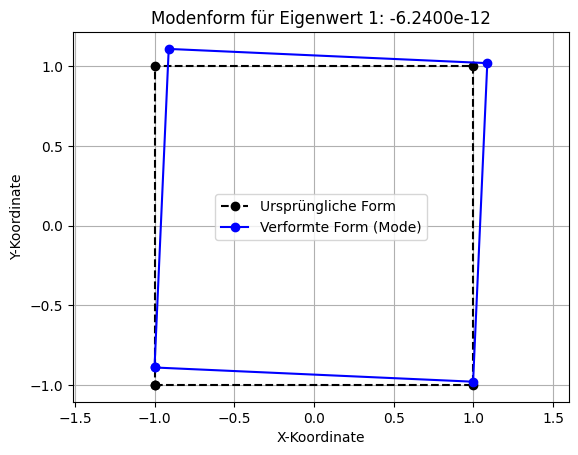

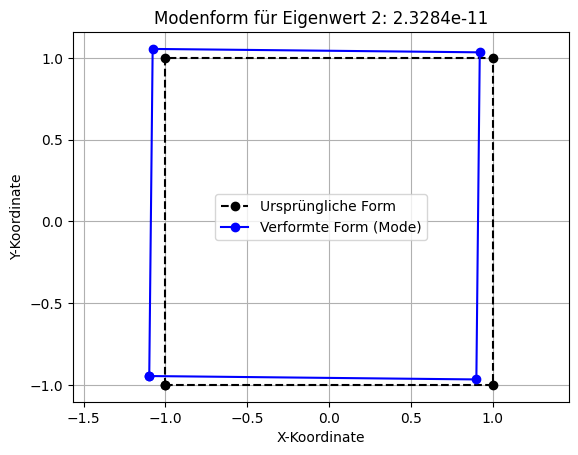

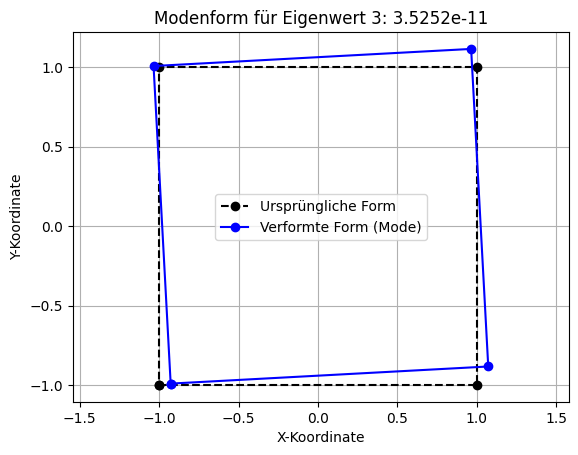

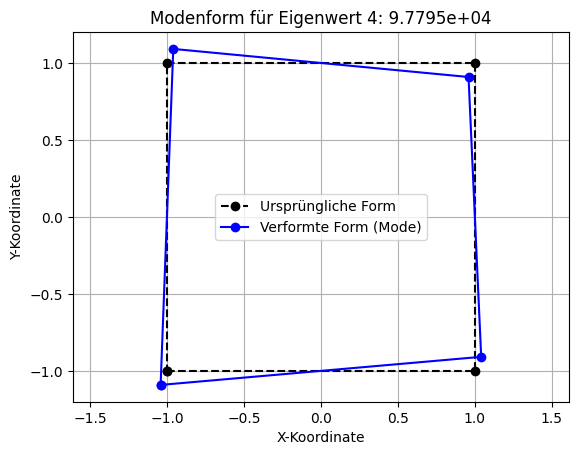

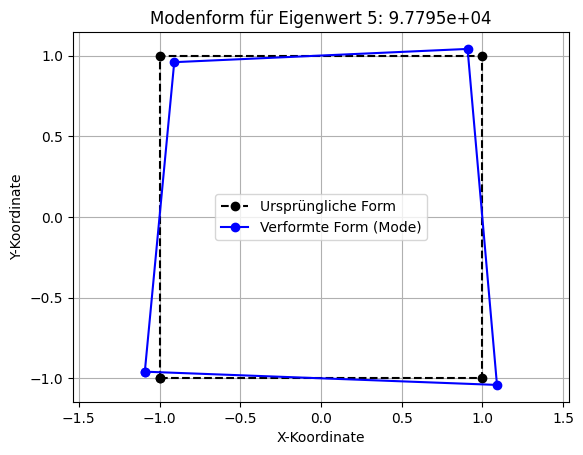

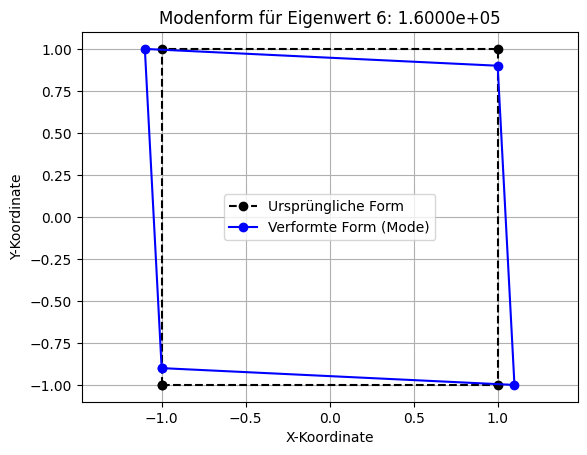

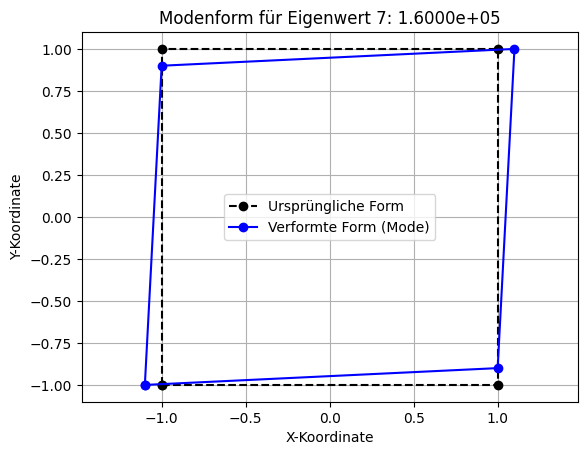

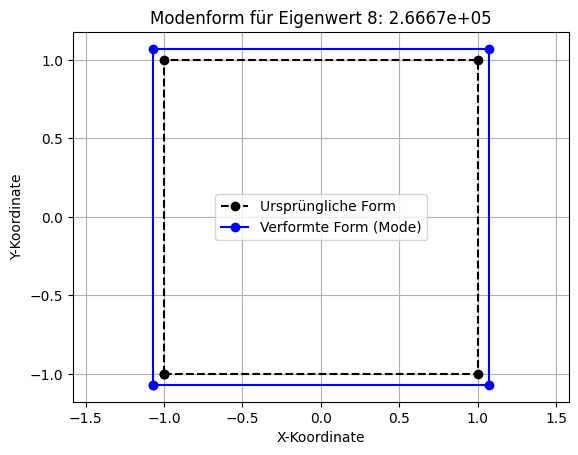

In [38]:
%matplotlib inline

def get_pure_modes_from_eigenvectors(eigenvectors_null_space, coords):
    """
    Wandelt die berechneten Eigenvektoren des Nullraums (Linearkombinationen)
    in reine Starrkörpermoden (Translationen und Rotation) um.

    Dieser Prozess wird oft als "Säuberung" der Moden bezeichnet.
    Eine robuste Methode hierfür ist die QR-Zerlegung.
    Die Idee ist, eine neue orthonormale Basis für den Nullraum zu finden, die so nah wie möglich an den bekannten, reinen Starrkörpermoden liegt.

    :param eigenvectors_null_space: Eine (ND*NNODE, 3) Matrix mit den ersten drei Eigenvektoren.
    :param coords: Ein Dictionary mit den ursprünglichen Knotenkoordinaten.
    :return: Eine Liste mit den drei "gesäuberten" Vektoren für die Starrkörpermoden.
    """
    # 1. Konstruieren Sie die idealen, reinen Starrkörpermoden (wie zuvor)
    # Reine Translation in X
    trans_x_ideal = np.zeros(NNODE * ND)
    trans_x_ideal[0::2] = 1

    # Reine Translation in Y
    trans_y_ideal = np.zeros(NNODE * ND)
    trans_y_ideal[1::2] = 1

    # Reine Rotation um den Schwerpunkt
    x_coords = np.array([coords[x1], coords[x2], coords[x3], coords[x4]])
    y_coords = np.array([coords[y1], coords[y2], coords[y3], coords[y4]])
    centroid_x = np.mean(x_coords)
    centroid_y = np.mean(y_coords)
    rotation_ideal = np.zeros(NNODE * ND)
    rotation_ideal[0::2] = -(y_coords - centroid_y)
    rotation_ideal[1::2] = (x_coords - centroid_x)

    # Stapeln Sie die idealen Moden zu einer (8, 3) Matrix
    ideal_modes = np.vstack([trans_x_ideal, trans_y_ideal, rotation_ideal]).T

    # 2. Projizieren Sie die idealen Moden auf den von den Eigenvektoren aufgespannten Nullraum
    # Dies stellt sicher, dass die resultierenden Vektoren im korrekten Nullraum liegen.
    # Formel: P_proj = V @ (V.T @ P_ideal)
    projection_matrix = eigenvectors_null_space @ eigenvectors_null_space.T
    projected_modes = projection_matrix @ ideal_modes

    # 3. Orthonormalisieren Sie die projizierten Vektoren mit der QR-Zerlegung
    # Dies erzeugt eine saubere, orthonormale Basis, die den idealen Moden sehr ähnlich ist.
    q, r = np.linalg.qr(projected_modes)

    # Die Spalten von q sind die neuen, reinen Modenvektoren.
    # Wir müssen möglicherweise das Vorzeichen anpassen, damit sie mit den idealen Moden übereinstimmen.
    for i in range(q.shape[1]):
        # Wenn das Skalarprodukt mit der entsprechenden idealen Mode negativ ist, drehen wir den Vektor um.
        if np.dot(q[:, i], ideal_modes[:, i]) < 0:
            q[:, i] *= -1

    return [q[:, 0], q[:, 1], q[:, 2]]

def visualize_eigenvector(eigenvector, coords, scale_factor=0.2, title="", show=False):
    """
    Visualisiert einen Eigenvektor als Verformung des Elements.

    :param eigenvector: Der zu visualisierende Eigenvektor (als NumPy-Array).
    :param coords: Ein Dictionary mit den ursprünglichen Knotenkoordinaten.
    :param scale_factor: Ein Faktor zur Skalierung der Verformung für eine bessere Sichtbarkeit.
    :param title: Der Titel des Plots.
    """
    # Extrahieren der ursprünglichen Koordinaten und Schließen der Form für den Plot
    original_x = np.array([coords[x1], coords[x2], coords[x3], coords[x4], coords[x1]])
    original_y = np.array([coords[y1], coords[y2], coords[y3], coords[y4], coords[y1]])

    # Umformen des Eigenvektors in (u, v) Verschiebungen pro Knoten
    displacements = eigenvector.reshape((NNODE, ND))

    # Berechnen der verformten Koordinaten
    deformed_x = original_x[:-1] + scale_factor * displacements[:, 0]
    deformed_y = original_y[:-1] + scale_factor * displacements[:, 1]

    # Schließen der verformten Form für den Plot
    deformed_x = np.append(deformed_x, deformed_x[0])
    deformed_y = np.append(deformed_y, deformed_y[0])

    # Plotten
    plt.figure()
    plt.plot(original_x, original_y, 'k--', marker='o', label='Ursprüngliche Form')
    plt.plot(deformed_x, deformed_y, 'b-', marker='o', label='Verformte Form (Mode)')
    plt.title(title)
    plt.xlabel("X-Koordinate")
    plt.ylabel("Y-Koordinate")
    plt.axis('equal')
    plt.legend()
    plt.grid(True)
    if show:
        plt.show()

# --- Beispiel für die Verwendung ---
# Holen Sie sich die Eigenwerte und Eigenvektoren erneut
K_np = np.array(K).astype(np.float64)
eigenvalues, eigenvectors = np.linalg.eigh(K_np)

# Sortieren der Eigenwerte und der zugehörigen Eigenvektoren
sorted_indices = np.argsort(eigenvalues)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

null_space_vectors = eigenvectors[:, :3]

# Holen Sie sich die reinen Moden aus den Eigenvektoren
pure_modes_from_ev = get_pure_modes_from_eigenvectors(null_space_vectors, coordinate_values)
mode_names = ["Abgeleitete X-Translation", "Abgeleitete Y-Translation", "Abgeleitete Rotation"]

# Visualisieren Sie die abgeleiteten reinen Moden
for i, mode in enumerate(pure_modes_from_ev):
    title = f"Reine Starrkörpermode aus Eigenvektor: {mode_names[i]}"
    visualize_eigenvector(mode, coordinate_values, title=title, show=True)


for i in range(8):
    eigenvector = eigenvectors[:, i]
    title = f"Modenform für Eigenwert {i+1}: {eigenvalues[i]:.4e}"
    visualize_eigenvector(eigenvector, coordinate_values, title=title, show=True)


### Stiffness matrix reduction

In [36]:
# keeping the following rows and columns:
# 0, 1, 2, 3, 4
K_reduced = K[[0, 1, 2, 3, 4], :][:, [0, 1, 2, 3, 4]]
K_reduced = K_reduced.applyfunc(lambda x: x.round(0))
K_red_np = np.array(K_reduced).astype(np.float64)
print()
print('The reduced stiffness matrix K is:')
sp.pprint(K_reduced)


The reduced stiffness matrix K is:
⎡97782.0   33333.0   -57782.0  -6667.0   -48885.0⎤
⎢                                                ⎥
⎢33333.0   97782.0    6667.0    8885.0   -33333.0⎥
⎢                                                ⎥
⎢-57782.0   6667.0   97782.0   -33333.0   8885.0 ⎥
⎢                                                ⎥
⎢-6667.0    8885.0   -33333.0  97782.0    6667.0 ⎥
⎢                                                ⎥
⎣-48885.0  -33333.0   8885.0    6667.0   97782.0 ⎦


### Load vector and solving the system

In [37]:
F = np.array([0, 0, 0, 0, 0])  # initialize the load vector
F[2] = 100

u = np.linalg.solve(K_red_np, F)  # solve the system of equations
print()
print('The displacements are:')
for i in range(NNODE):
    try:
        print(f'Node {i + 1}: u = {u[2 * i]:.6f}')
    except IndexError:
        print(f'Node {i + 1}: u = {0.:.6f}')
    try:
        print(f'Node {i + 1}: v = {u[2 * i + 1]:.6f}')
    except IndexError:
        print(f'Node {i + 1}: v = {0.:.6f}')


The displacements are:
Node 1: u = 0.002273
Node 1: v = -0.000898
Node 2: u = 0.002773
Node 2: v = 0.001148
Node 3: u = 0.000500
Node 3: v = 0.000000
Node 4: u = 0.000000
Node 4: v = 0.000000
